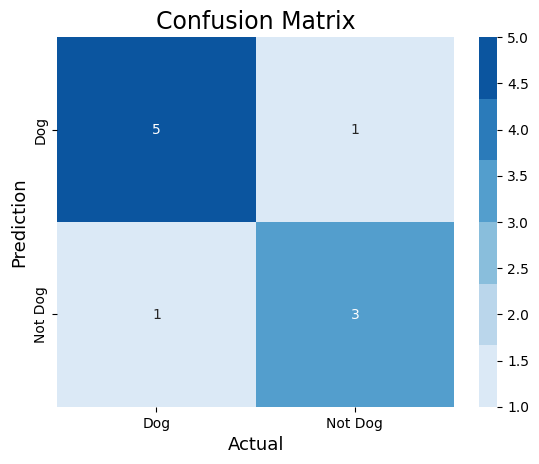

In [ ]:
#To demonstrate confusion matrix using python

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Create the NumPy array for actual and predicted labels.
actual    = np.array(
  ['Dog','Dog','Dog','Not Dog','Dog','Not Dog','Dog','Dog','Not Dog','Not Dog'])
predicted = np.array(
  ['Dog','Not Dog','Dog','Not Dog','Dog','Dog','Dog','Dog','Not Dog','Not Dog'])

#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)

cp = sns.color_palette("Blues")
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            cmap=cp,
            xticklabels=['Dog','Not Dog'],
            yticklabels=['Dog','Not Dog'])

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()



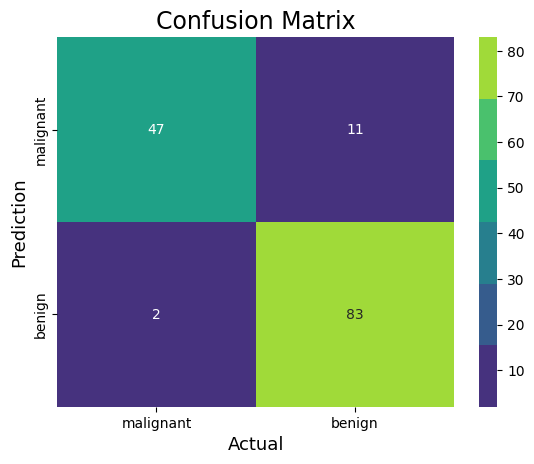

Accuracy   : 0.9090909090909091
Precision : 0.8829787234042553
Recall    : 0.9764705882352941
F1-score  : 0.9273743016759776


In [ ]:
#To demonstrate  2 class confusion matrix using python

#Import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the breast cancer dataset
X, y= load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

# Train the model
tree = DecisionTreeClassifier(random_state=23)
tree.fit(X_train, y_train)

# preduction
y_pred = tree.predict(X_test)

# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)
cp = sns.color_palette("viridis")
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap=cp,
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)


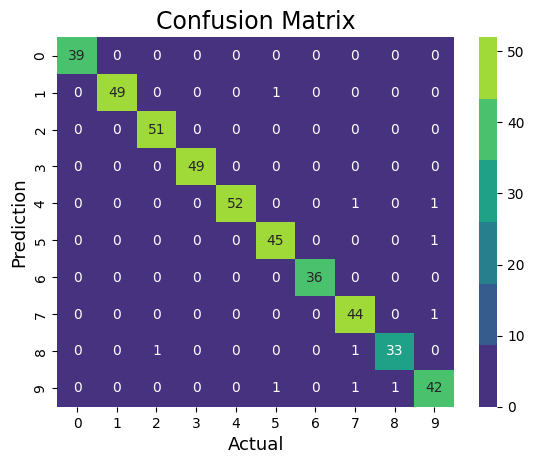

Accuracy   : 0.9777777777777777


In [ ]:
#Verifying the performance of a multi class confusion matrix by using choosen database with python code

#Import the necessary libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the breast cancer dataset
X, y= load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

# Train the model
clf = RandomForestClassifier(random_state=23)
clf.fit(X_train, y_train)

# preduction
y_pred = clf.predict(X_test)

# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)
cp = sns.color_palette("viridis")

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            cmap=cp,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)


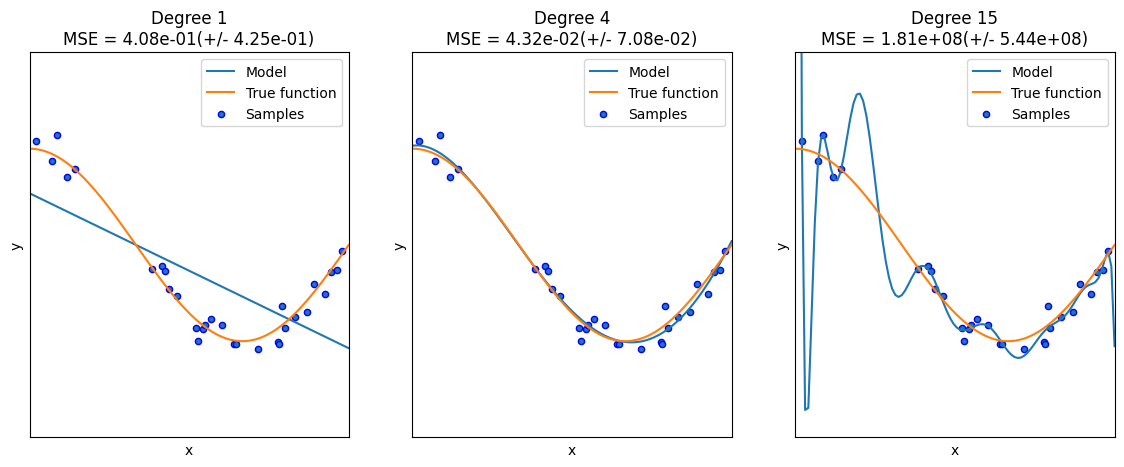

In [ ]:
#Verifying the performance of a over fitting by using choosen database with python code

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()


Estimated coefficients:
b_0 = 1.2363636363636363            
b_1 = 1.1696969696969697


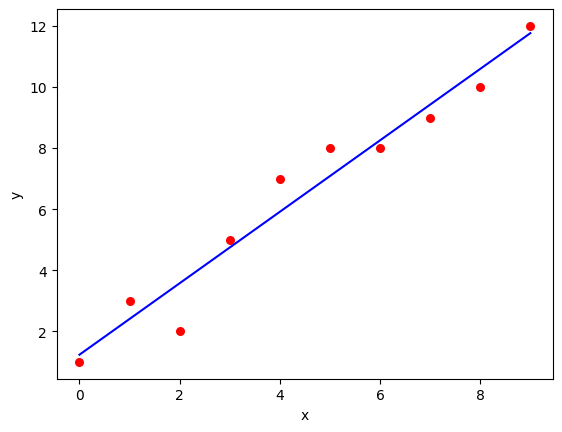

In [ ]:
#To demonstrate the performance of a linear regression by using choosen database with python code
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "r",
               marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "b")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()

def main():
    # observations / data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)

if __name__ == "__main__":
    main()



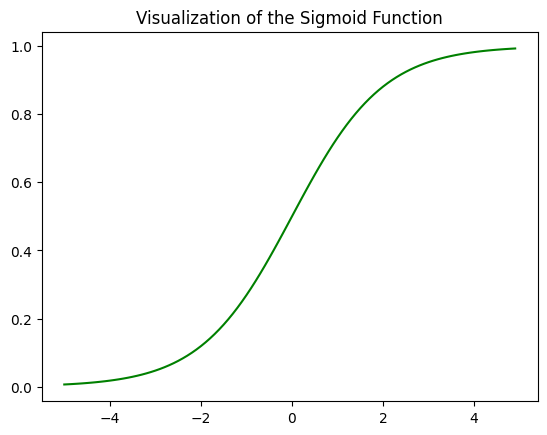

In [ ]:
#To demonstrate  the performance of a logistic regression  by using choosen database with python code.

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp( - z))

plt.plot(np.arange(-5, 5, 0.1), sigmoid(np.arange(-5, 5, 0.1)))
plt.title('Visualization of the Sigmoid Function')

plt.show()


In [ ]:
#Finding accuracy value of iris data set using KNN algorithm

import numpy as np
import pandas as pd

dataset = pd.read_csv("/content/iris.data.csv")
"""
The breast cancer dataset has the following features: Sample code number, Clump Thickness, Uniformity of Cell Size,
Uniformity of Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin,
 Normal Nucleoli, Mitosis, Class.
"""
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.shape
#splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
#Feature Scaling
"""
Feature scaling is the process of converting the data into a given range.
In this case, the standard scalar technique is used.
"""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Training the K-Nearest Neighbors (K-NN) Classification model on the Training set
"""
Once the dataset is scaled, next, the K-Nearest Neighbors (K-NN) classifier algorithm is used to create a model.
The hyperparameters such as n_neighbors, metric, and p are set to 5, Minkowski, and 2 respectively.
 The remaining hyperparameters are set to default values.
"""
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

classifier.fit(X_train, y_train)
"""
Display the results (confusion matrix and accuracy)
Here evaluation metrics such as confusion matrix and accuracy are used to evaluate the performance of the model built using a decision tree classifier.
"""
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


0.9333333333333333

In [ ]:
#finding accuracy value of iris data set using NAVIE BAYES algorithm

import numpy as np
import pandas as pd
#Importing the dataset
"""
Next, we import or read the dataset. Click here to download the breast cancer dataset used in this implementation.
 After reading the dataset, divide the dataset into concepts and targets. Store the concepts into X and
 targets into y.
"""
dataset = pd.read_csv("/content/iris.data.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
"""
Splitting the dataset into the Training set and Test set
Once the dataset is read into the memory, next, divide the dataset into two parts, training and
testing using the train_test_split function from sklearn.
 The test_size and random_state attributes are set to 0.25 and 0 respectively.
 You can change these attributes as per your requirements.
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Feature Scaling
"""
Feature scaling is the process of converting the data into a min-max range. In this case,
 the standard scalar method is used.
"""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
"""
Training the Naive Bayes Classification model on the Training set
Once the dataset is scaled, next, the Naive Bayes classifier algorithm is used to create a model.
The GaussianNB function is imported from sklearn.naive_bayes library. The hyperparameters such as kernel,
and random_state to linear, and 0 respectively. The remaining hyperparameters of the support vector machine
 algorithm are set to default values.
"""
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

#Naive Bayes classifier model
GaussianNB(priors=None, var_smoothing=1e-09)

#Display the results (confusion matrix and accuracy)
"""
Here evaluation metrics such as confusion matrix and accuracy are used to evaluate the performance of
the model built using a decision tree classifier.
"""
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


In [ ]:
#finding accuracy value of iris data set using  LOGISTIC  REGRESSION algorithm

import numpy as np
import pandas as pd

#"Importing the dataset
"""
After importing the necessary libraries, next, we import or read the dataset.
 Click here to download the breast cancer dataset used in this implementation.
 The breast cancer dataset has the following features:
 Sample code number, Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion,
 Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin, Normal Nucleoli, Mitosis, Class.
"""


# divide the dataset into concepts and targets. Store the concepts into X and targets into y.
dataset = pd.read_csv("/content/iris.data.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Splitting the dataset into the Training set and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2)

#Feature Scaling
"""
Feature scaling is the process of converting the data into a given range. In this case, the standard scalar technique is used.
from sklearn.preprocessing import StandardScaler
"""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
"""
Training the Logistic Regression (LR) Classification model on the Training set
Once the dataset is scaled, next, the Logistic Regression (LR) classifier algorithm is used to create a model.
The hyperparameters such as random_state to 0 respectively.
 The remaining hyperparameters Logistic Regression (LR) are set to default values.
 """
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
#Logistic Regression (LR) classifier model
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
#Display the results (confusion matrix and accuracy)
"""
Here evaluation metrics such as confusion matrix and accuracy are used to evaluate the performance of the model
built using a decision tree classifier.
"""
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


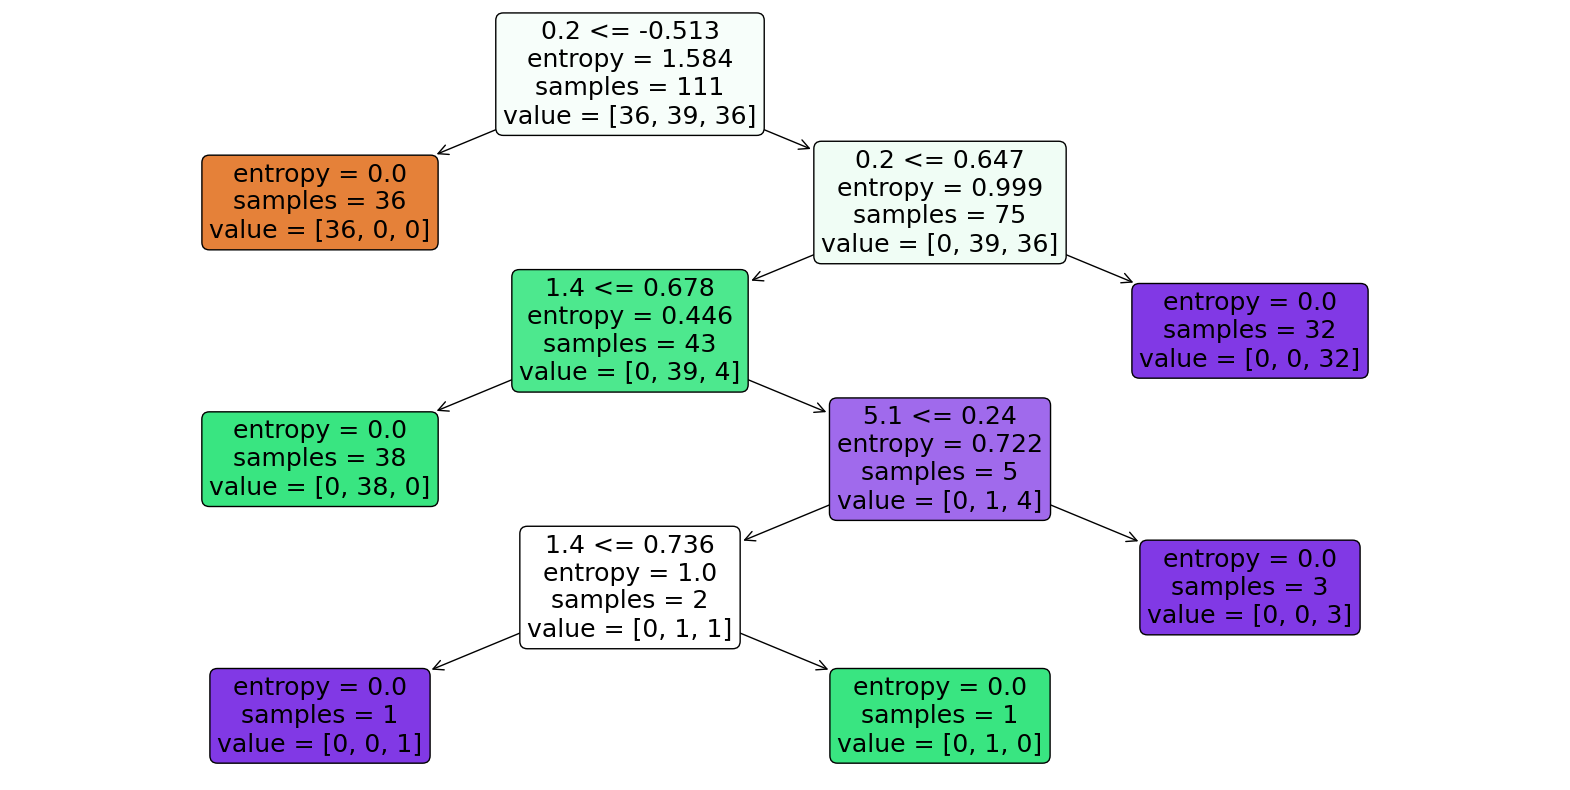

[[13  0  0]
 [ 0  9  2]
 [ 0  0 14]]


0.9473684210526315

In [6]:
#finding accuracy value of iris data set using DECISION TREE algorithm

import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("/content/iris.data.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 8)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 5)
classifier.fit(X_train, y_train)

# Display the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(classifier, filled=True, rounded=True, feature_names=dataset.columns[:-1])
plt.show()

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Display the results (confusion matrix and accuracy)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
#finding accuracy value of iris data set using SVM  algorithm

import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("/content/iris.data.csv")

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluating the performance of the model using confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))


[[16  0  0]
 [ 0  8  3]
 [ 0  0 11]]
Accuracy: 92.11%


In [8]:
#finding accuracy value of iris data set using  RANDOM FOREST algorithm

import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("/content/iris.data.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=39)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred))


[[11  0  0]
 [ 0 13  1]
 [ 0  0 13]]
Accuracy: 0.9736842105263158


Iteration 1: Cost 4352.088931274409, Weight         0.7593291142562117, Bias 0.02288558130709
Iteration 2: Cost 1114.8561474350017, Weight         1.081602958862324, Bias 0.02918014748569513
Iteration 3: Cost 341.42912086804455, Weight         1.2391274084945083, Bias 0.03225308846928192
Iteration 4: Cost 156.64495290904443, Weight         1.3161239281746984, Bias 0.03375132986012604
Iteration 5: Cost 112.49704004742098, Weight         1.3537591652024805, Bias 0.034479873154934775
Iteration 6: Cost 101.9493925395456, Weight         1.3721549833978113, Bias 0.034832195392868505
Iteration 7: Cost 99.4293893333546, Weight         1.3811467575154601, Bias 0.03500062439068245
Iteration 8: Cost 98.82731958262897, Weight         1.3855419247507244, Bias 0.03507916814736111
Iteration 9: Cost 98.68347500997261, Weight         1.3876903144657764, Bias 0.035113776874486774
Iteration 10: Cost 98.64910780902792, Weight         1.3887405007983562, Bias 0.035126910596389935
Iteration 11: Cost 98.6408

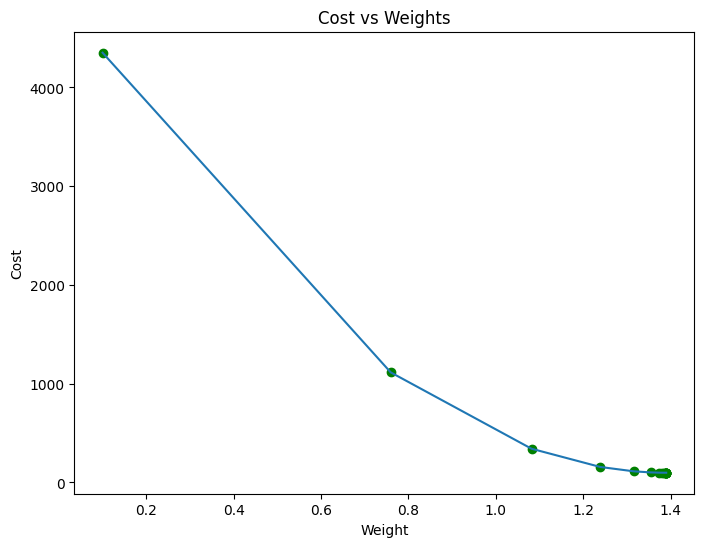

Estimated Weight: 1.389738813163012
Estimated Bias: 0.03509461674147458


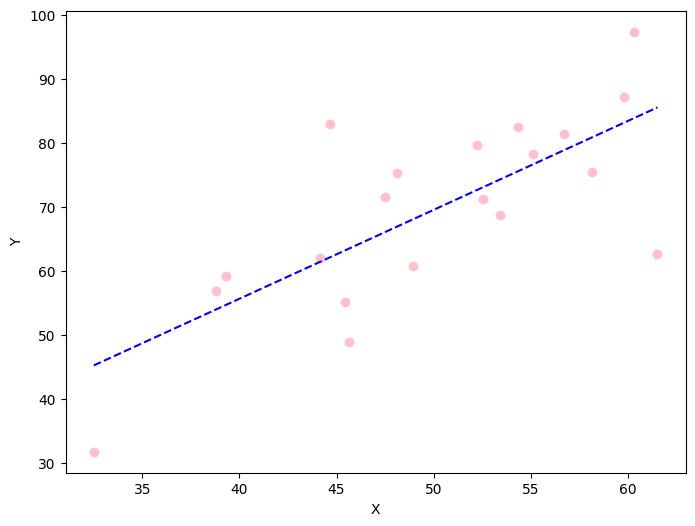

In [11]:
#To demonstrate gradient descent using python(actual data)

# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_predicted):

    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
                     stopping_threshold = 1e-6):

    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))

    costs = []
    weights = []
    previous_cost = None

    # Estimation of optimal parameters
    for i in range(iterations):

        # Making predictions
        y_predicted = (current_weight * x) + current_bias

        # Calculating the current cost
        current_cost = mean_squared_error(y, y_predicted)

        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)

        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)

        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")


    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='green')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()

    return current_weight, current_bias


def main():

    # Data
    X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
           55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
           45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
           48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
    Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
           78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
           55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
           60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

    # Estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

    # Making predictions using estimated parameters
    Y_pred = estimated_weight*X + estimated_bias

    # Plotting the regression line
    plt.figure(figsize = (8,6))
    plt.scatter(X, Y, marker='o', color='pink')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


if __name__=="__main__":
    main()


Iteration 100: Cost 274.7135068175031, Weight 1.2883463473455743, Bias 0.07762035027873679
Iteration 200: Cost 274.49587741697513, Weight 1.2875253901861716, Bias 0.1242635392098511
Iteration 300: Cost 274.27868462255617, Weight 1.2867052569385722, Bias 0.17085991708211085
Iteration 400: Cost 274.0619275583309, Weight 1.2858859467758992, Bias 0.2174095308750488
Iteration 500: Cost 273.84560535014145, Weight 1.285067458872105, Bias 0.2639124275210493
Iteration 600: Cost 273.6297171255836, Weight 1.2842497924019718, Bias 0.3103686539053953
Iteration 700: Cost 273.4142620140034, Weight 1.2834329465411094, Bias 0.35677825686631576
Iteration 800: Cost 273.19923914649354, Weight 1.282616920465955, Bias 0.40314128319503306
Iteration 900: Cost 272.98464765588983, Weight 1.2818017133537727, Bias 0.4494577796358098
Iteration 1000: Cost 272.77048667676803, Weight 1.2809873243826522, Bias 0.49572779288599633
Iteration 1100: Cost 272.5567553454398, Weight 1.2801737527315074, Bias 0.5419513695960769

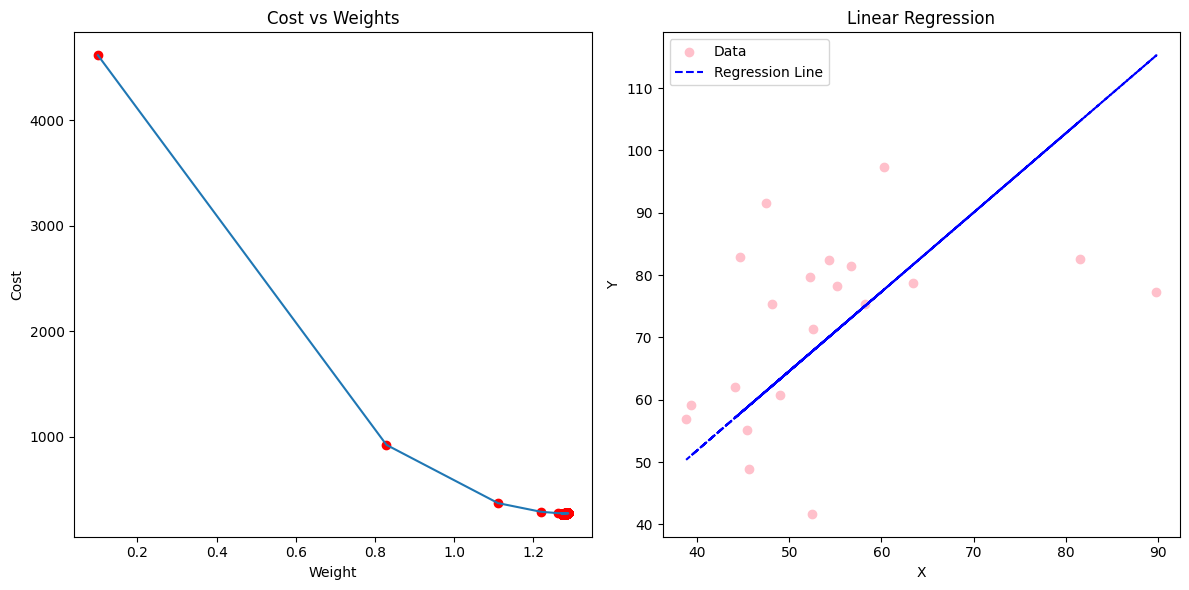

Estimated Weight: 1.272888252198252
Estimated Bias: 0.9558815898740776


In [23]:
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_predicted):
    cost = np.sum((y_true - y_predicted) ** 2) / len(y_true)
    return cost

def gradient_descent(x, y, iterations=1000, learning_rate=0.0001,
                     stopping_threshold=1e-6):

    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))

    costs = []
    weights = []
    previous_cost = None

    for i in range(iterations):
        y_predicted = (current_weight * x) + current_bias
        current_cost = mean_squared_error(y, y_predicted)

        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)

        weight_derivative = -(2/n) * sum(x * (y - y_predicted))
        bias_derivative = -(2/n) * sum(y - y_predicted)

        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

        if (i + 1) % 100 == 0:
            print(f"Iteration {i + 1}: Cost {current_cost}, Weight {current_weight}, Bias {current_bias}")

    plt.figure(figsize=(12, 6))

    # Plotting the cost vs. weights
    plt.subplot(1, 2, 1)
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.xlabel("Weight")
    plt.ylabel("Cost")

    # Plotting the regression line on the data points
    plt.subplot(1, 2, 2)
    plt.scatter(x, y,  color='pink', label='Data')
    plt.plot(x, current_weight * x + current_bias, color='blue', linestyle='dashed',
             label='Regression Line')
    plt.title("Linear Regression")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()

    plt.tight_layout()
    plt.show()

    return current_weight, current_bias

def main():
    X = np.array([52.50234527, 63.42680403, 81.53035803, 47.47563963, 89.81320787,
                  55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
                  45.41973014, 54.35163488, 44.1640495, 58.16847072, 56.72720806,
                  48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
    Y = np.array([41.70700585, 78.77759598, 82.5623823, 91.54663223, 77.23092513,
                  78.21151827, 79.64197305, 59.17148932, 75.3312423, 71.30087989,
                  55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
                  60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

if __name__ == "__main__":
    main()


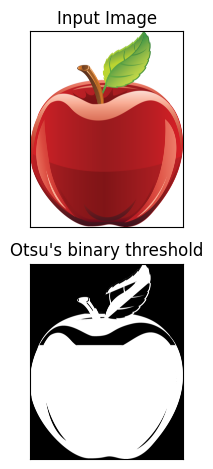

In [18]:
# SEGMENTATION
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(r'/content/R.png')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(211),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.imsave(r'thresh.png',thresh)
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


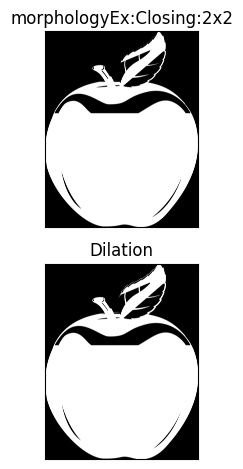

In [19]:
# SEGMENTATION
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(r'/content/R.png')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.subplot(211),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(sure_bg, 'gray')
plt.imsave(r'dilation.png',sure_bg)
plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


Estimated coefficients:
b_0 = 1.2363636363636363            
b_1 = 1.1696969696969697


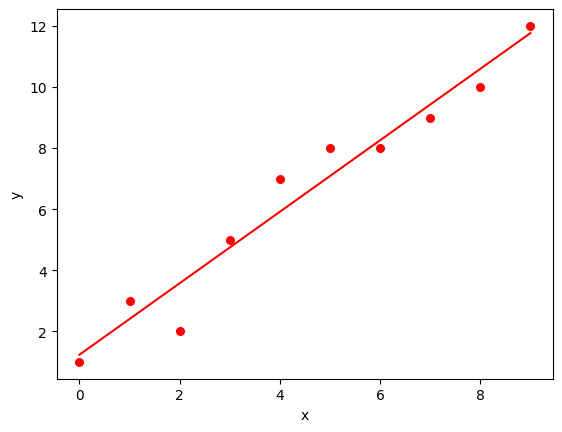

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "r",
               marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "red")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()

def main():
    # observations / data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)

if __name__ == "__main__":
    main()
